# This notebook's aim is to transform the pre-processed documents into vectors and do an unsupervised analysis

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Jeremynadal33/adventofcode2020/blob/master/adventofcode2020.ipynb)

## Here, are compared two unsupervised methods : LDA and NMF
## We will compare the results for two different vectorization methods : Bag of Word and Tfidf
First, import the relevant libraries : 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import re
import time

## My script : 
from function import *

In [8]:
# Specific libraries : 
import nltk
from sklearn.feature_extraction.text import CountVectorizer # BoW
from sklearn.feature_extraction.text import TfidfVectorizer # Tfidf

In [3]:
root_dir = '/Users/jeremynadal/Documents/Formation OC IML/P5-API/'
input_dir = root_dir + 'inputs/'
png_dir = root_dir + 'pngs/'

In [5]:
!ls inputs

example_posts.csv     posts.csv             processed_dataset.csv


In [7]:
data = pd.read_csv(input_dir+'processed_dataset.csv')

print(data.shape)
print(data.dtypes)
data.head()

(39409, 5)
Tags              object
Title             object
Body              object
nb_tags            int64
processed_text    object
dtype: object


,Tags,Title,Body,nb_tags,processed_text
0,['c#'],How to convert decimal to double in C#,<p>I want to use a <code>Track-Bar</code> to c...,1,"['convert', 'double', 'c#', 'convert', 'double..."
1,"['c#', '.net']","In C#, how do I calculate someone's age based ...",<p>Given a <code>DateTime</code> representing ...,2,"['c#', 'calculate', 'age', 'base', 'datetime',..."
2,['c#'],Calculate relative time in C#,<p>Given a specific <code>DateTime</code> valu...,1,"['calculate', 'time', 'c#', 'calculate', 'time..."
3,['html'],Determine a user's timezone,<p>Is there a standard way for a web server to...,1,"['determine', 'timezone', 'determine', 'timezo..."
4,['.net'],Difference between Math.Floor() and Math.Trunc...,"<p>What is the difference between <a href=""htt...",1,"['difference', 'mathfloor', 'mathtruncate', 'd..."


# To begin with, we will intend the method on only a part of the data because the algorithms are supposed to be time-exhaustive 

In [9]:
data = data[:1000]

In [51]:
def get_all_tags(data):
    res = []
    for i in range(data.shape[0]):
        for j in range(data['nb_tags'][i]):
            res.append(re.sub('[\[\]\' ]','',data['Tags'][i].split(',')[j]))

    return pd.Series(res)

tags = get_all_tags(data)

In [52]:
tags

0            c#
1            c#
2          .net
3            c#
4          html
         ...   
1344         c#
1345       .net
1346    windows
1347     python
1348     python
Length: 1349, dtype: object

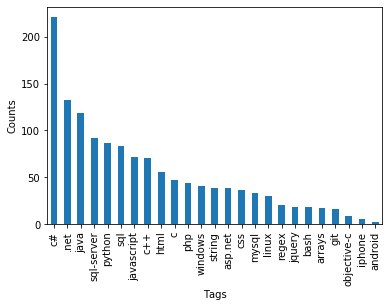

In [53]:
pd.Series(tags).value_counts(normalize=False)[:25].plot(kind = 'bar')
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

## Lets start by getting the different vectors : 

In [ ]:
vectorizer = TfidfVectorizer(tokenizer = lambda x: x,
                             preprocessor = lambda x: x,
                             lowercase = False,
                             max_features = None,
                             stop_words = [':',';','=']
                            )  
X = vectorizer.fit_transform(test['processed_text'])
print(vectorizer.get_feature_names())

print(X.toarray())